## 1- Implement Logistic Regression from scratch - Python (5 Marks)
Ref: https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

Importing

In [ ]:
import random as rd
from sklearn import preprocessing
from sklearn.datasets import load_iris

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [ ]:
import pandas as pd

import itertools

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

Function

In [ ]:
#sigmoid function
def sigmoid(x):
  return 1/(1+np.exp(-x))

Logistic regression 

Implementation

In [ ]:
class Logistic_regression():
  def __init__(self, iterations, leaning_rate):
    self.leaning_rate = leaning_rate
    self.iterations = iterations
    self.weights = None
    self.bias = 0
    self.accuracy = 0
  
  #Training
  def fit(self, x_train, y_train):
    samples_number, features_number = x_train.shape
    #Random weigths
    self.weights = np.zeros(features_number)
    #iterations
    for i in range(self.iterations):
      y = np.dot(x_train, self.weights) + self.bias
      y_l = sigmoid(y)
      N = samples_number
      delta_j_w = (1/N) * np.dot(x_train.T, (y_l - y_train))
      delta_j_b = (1/N) * np.sum(y_l - y_train)
      self.weights = self.weights - (self.leaning_rate * delta_j_w)
      self.bias = self.bias - (self.leaning_rate * delta_j_b)

  #Testing
  def predict(self, x_test, y_test):
    y = np.dot(x_test,  self.weights) + self.bias
    y_l = sigmoid(y)
    y_predicted = [0 if i < 0.5 else 1 for i in y_l]
    error = 0
    length = len(y_test)
    for i in range(length):
      if (y_test[i] != y_predicted[i]):
        error+=1
    self.accuracy = (length-error)/length
    #return y_predicted
  #Getting accuracy

## 2- (5 Marks)
In this task, you'll be working with the heart attack dataset (https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility)

   * Propose at least 2 questions about the dataset. 
   * Use visualizations and relations between variables to support your analysis in answering these questions. 
   * Perform any necessary cleaning steps. 
   * Fit a logistic regression model. 
   * Report model performance.
   * iscuss your findings and observations. 
   * scuss dataset limitations. 
   * organize yhe notebooks with detailed analysis and logical flow of conclusions.
   * Evaluate your logistic regression model.
   * Comment on each score and indicate whether or not you think the used metric is suitable for this particular problem. 


Reading data

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Questions about the dataset

In [ ]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Dimensions
df.shape

(303, 14)

In [ ]:
#NANs numbers
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Duplicates numbers
df.duplicated().sum()

1

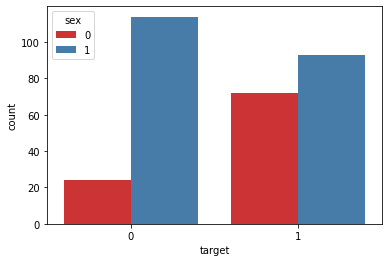

In [ ]:
#relation between the gender and heart attacks
df_copy = df.copy()
sns.countplot(x='target', hue='sex', data=df_copy, palette='Set1') 

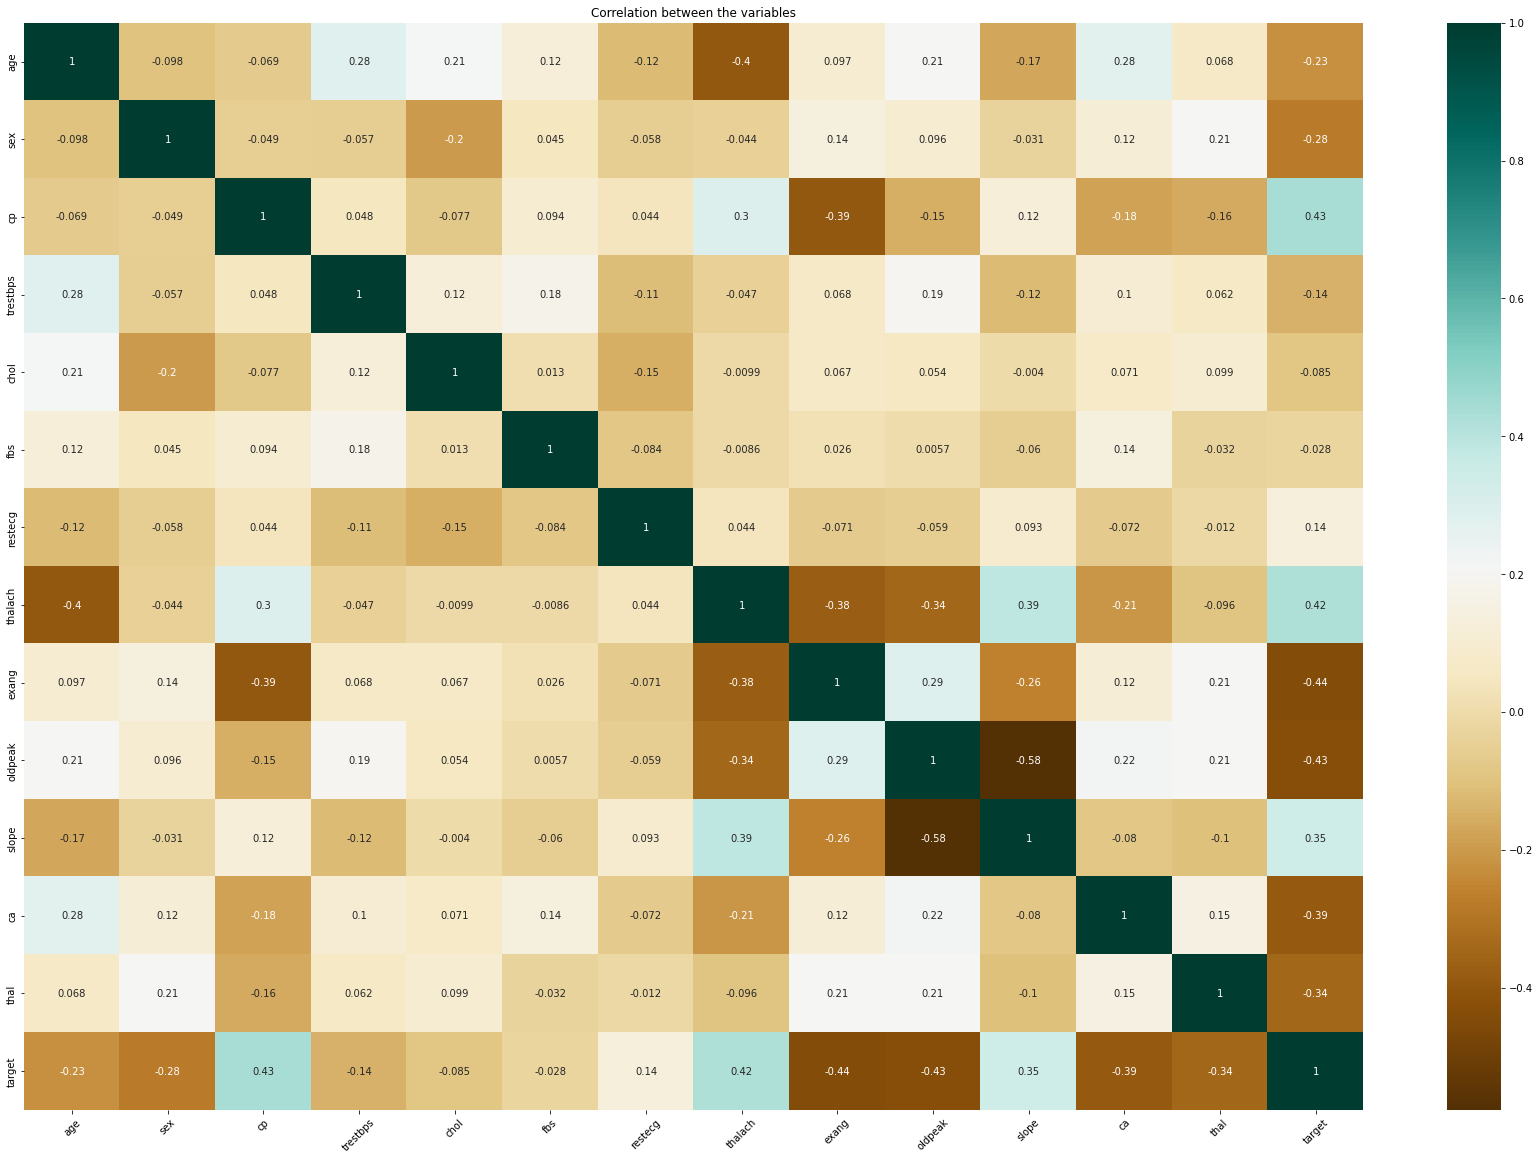

In [ ]:
#correlation
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot = True, ax=ax, cmap="BrBG");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

Cleaning data

In [ ]:
#there is one duplicate, so I will remove it
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Pre-processing for data

In [ ]:
df_copy = df.copy()
X = df_copy.drop("target", axis=1).to_numpy()
y = df.target.to_numpy()
#shuffling
x_shuffled, y_shuffled = shuffle_arrays_unison(arrays=[X, y], random_seed=42)
#normalize the data attributes
input = preprocessing.normalize(x_shuffled)
output = y_shuffled
#train test splitting
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

Fitting a logistic regression model with repeating

In [ ]:
lg = Logistic_regression(100,0.9)
lg.fit(x_train, y_train)
lg.predict(x_test, y_test)
print("Accuracy:",str(lg.accuracy*100)+"%")

Accuracy: 49.18032786885246%


In [ ]:
lg = Logistic_regression(1000,0.9)
lg.fit(x_train, y_train)
lg.predict(x_test, y_test)
print("Accuracy:",str(lg.accuracy*100)+"%")

Accuracy: 57.377049180327866%


In [ ]:
lg = Logistic_regression(1000000,0.1)
lg.fit(x_train, y_train)
lg.predict(x_test, y_test)
print("Accuracy:",str(lg.accuracy*100)+"%")

Accuracy: 72.1311475409836%


In [ ]:
lg = Logistic_regression(1000000,0.3)
lg.fit(x_train, y_train)
lg.predict(x_test, y_test)
print("Accuracy:",str(lg.accuracy*100)+"%")

Accuracy: 78.68852459016394%


In [ ]:
lg = Logistic_regression(1000000,0.5)
lg.fit(x_train, y_train)
lg.predict(x_test, y_test)
print("Accuracy:",str(lg.accuracy*100)+"%")

Accuracy: 80.32786885245902%


In [ ]:
lg = Logistic_regression(1000000,0.9)
lg.fit(x_train, y_train)
lg.predict(x_test, y_test)
print("Accuracy:",str(lg.accuracy*100)+"%")

Accuracy: 83.60655737704919%


Comments, observasion, and limitations

1. I tried a lot of different values of iterations and learning rate, but found that its accuracy is worse than NN.
2. Small dataset may cause overfit which will increase the accuracy of training and decrease the accuracy of testing.
3. We need to use suitable parameters (iterations and learning rate) to get suitable accuracy.